In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
digits = load_digits()

In [3]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [4]:
print("Image data shape",digits.data.shape)

Image data shape (1797, 64)


In [6]:
print("Image label shape", digits.target.shape)

Image label shape (1797,)


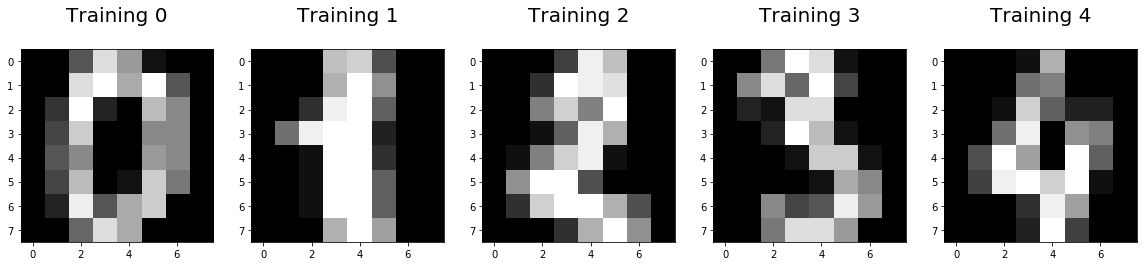

In [9]:
plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title ('Training %i\n' % label,fontsize = 20)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.23,random_state = 2)

In [12]:
print(X_train.shape,X_test.shape)

(1383, 64) (414, 64)


In [13]:
print(y_train.shape,y_test.shape)

(1383,) (414,)


In [15]:
from sklearn.linear_model import LogisticRegression
logisreg = LogisticRegression()
logisreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# predict for one observation(image)
print(logisreg.predict(X_test[0].reshape(1,-1)))

[4]


In [19]:
y_test[0]

4

In [21]:
logisreg.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [22]:
y_test[0:10]

array([4, 0, 9, 1, 4, 7, 1, 5, 1, 6])

In [23]:
predictions = logisreg.predict(X_test)

In [37]:
score = logisreg.score(X_test,y_test)
print(score)

0.9420289855072463


In [31]:
#confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  2  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  3  2  0]
 [ 0  2  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  2  0  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  1  3 28]]


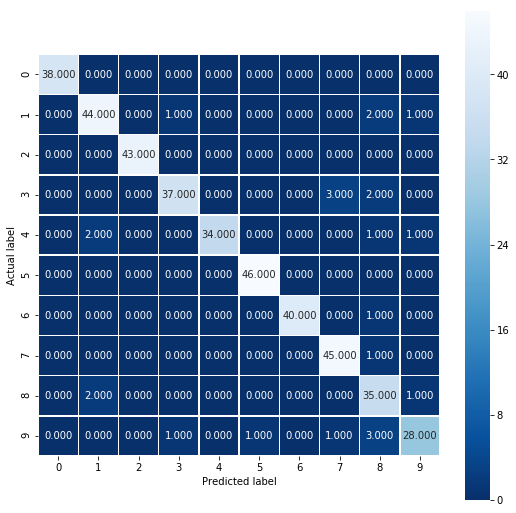

In [35]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True,fmt = ".3f",linewidths=.5,square= True,cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score : {0}'.format(score);
plt.show(all_sample_title);